# One-dimensional infinite deep well mapping
$$\psi = \sqrt{\frac{2}{L}}sin(\frac{n\pi x}{L})$$

In [ ]:
"""
    Created by Yanxing Li on 2018/5/7.
    Copyright © 2018年 WATT LEE. All rights reserved.
    """

import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from pylab import *

n = 1
E = 1

class data:
    x = []
    y = []
    def __init__(self,x,y):
        self.x = x
        self.y = y
"""
    @brief: the differential equation
    """
def func(y,x):
    return array([y[1],x**2*y[0]-E*y[0]])
"""
    @brief: OdeSolve function
    @param: f       derived function
    @param: a       the initial value of x
    @param: b       the last value of x
    @param: alpha   the first value of y
    @param: m       the derivative on x=a
    @param: k       number of intervals
    @return: y[:,0] the value of y
    """
def OdeSolve(f,a,b,alpha,m,k):
    x = linspace(a,b,k)
    yinit = array([alpha,m])
    y = odeint(f,yinit,x)
    return y[:,0]

"""
    @brief: shootev
    @param: n       num
    @param: a       the initial value of x
    @param: b       the last value of x
    @param: func    the differential equation
    @param: alpha   the first value of y
    @param: beta    the last value of y
    @param: m1      the guessed derivative on x=a
    @param: tor     tolerence
    @return: x      selceted x value
    @return: y      solved y value
    """
def shootev(k,a,b,alpha,beta,m1,tor):
    m = []
    yb = []
    x = linspace(a,b,k)
    m.append(m1)
    y = OdeSolve(func,a,b,alpha,m[0],k)
    yb.append(y[k-1])
    if abs(yb[0]-beta) >= tor:
        m.append(m[0]*beta/yb[0])
        y = OdeSolve(func,a,b,alpha,m[1],k)
        yb.append(y[k-1])
        i = 1
        while abs(yb[i]-beta) >= tor :
            l = len(m)
            m.append(m[l-1]+(beta-yb[i])*(m[l-1]-m[l-2])/(yb[i]-yb[i-1]))
            y = OdeSolve(func,a,b,alpha,m[i+1],k)
            yb.append(y[k-1])
            i = i + 1
        datas = data(x,y)
        return datas
    else:
        datas = data(x,y)
        return datas

for i in range(1,2):
    res = shootev(1000,-4,4,0.00001,0.00001,100,1e-9)
    plt.plot(res.x,res.y,label='E ='+str(i))
    E = E + 2
    n = n + 1
plt.xlabel('x')
plt.ylabel('phi')
plt.grid(True)
plt.legend(loc=4)
plt.title('shoot method on 1D infinite deep well mapping')
plt.show()


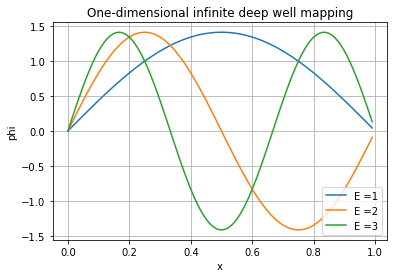

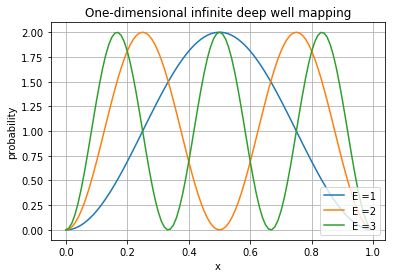

In [28]:
"""

Created by Yanxing Li on 2018/4/28.
Copyright © 2018年 WATT LEE. All rights reserved.

"""

import numpy as np
import math
import matplotlib.pyplot as plt

"""
@brief: Euler polygonometry function
@param: n       the number of equal devision points in the section x0 to xn
@param: f       derived function
@param: x0      the first value of array x
@param: y0      the first value of array y
@param: xn      the last value of array x
@return: x      independent variable
@return: y      dependent variable
@return: p      the initial number of iteration
"""   
def EulerPolyFun(n,f,x0,y0,xn): 
    h = (xn-x0)/n
    x = np.arange(x0,xn,h)
    y = []
    p = []
    y.append(y0)
    p.append(y0)
    for i in range(0,n-1):
        p.append(y[i] + h*f(x[i],y[i])) 
        y.append(y[i] + h/2*(f(x[i],y[i])+f(x[i+1],p[i+1])))
    class data:
        pl = []
        xl = []
        yl = []
        def __init__(self,pl,xl,yl):
            self.pl = pl
            self.xl = xl
            self.yl = yl
            
    datas = data(p,x,y)
    return datas

"""
@brief: boundary conditions function 
@param: x       means x in function
@param: y       means y in function
@return:z       means y'in function
"""
def func(x,y,n):
    z = -n*math.pi/2*y**2
    return z


res = EulerPolyFun(100,func,1,1,50)

#plot the figure of the curve
plot1=plt.plot(res.xl, res.pl, '*',label='original values')
plot2=plt.plot(res.xl, res.yl, 'r',label='Euler Ploygon values')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.legend(loc = 4)
plt.title('Euler Polygonometry')
plt.show()


class WaveFunc:
    def __init__(self,psi,probability):
        self.probability = probability
        self.psi = psi

L = 1
h = 6.626e-34
E = 0
psi = []
prob = []
x = np.arange(0,1,0.01)

"""
@brief:  One-dimensional infinite deep well mapping
@param:  n    the Energy Level
@param:  x    the position of particle
@return: psi  the wave function of particle
"""
def OneDInfDeepWellMapping(n,x):
    psi = math.sqrt(2/L)*np.sin(n*math.pi*x/L)
    E = n**2
    prob = abs(psi) ** 2
    wf = WaveFunc(psi,prob)
    return wf

for i in range(1,4):
    for j in np.arange(0,1,0.01):
        psi.append(OneDInfDeepWellMapping(i,j).psi)
    plot1=plt.plot(x, psi, label='E ='+str(i))
    psi = []

plt.xlabel('x')
plt.ylabel('phi')
plt.grid(True)
plt.legend(loc=4)
plt.title('One-dimensional infinite deep well mapping')
plt.show() 

for i in range(1,4):
    for j in np.arange(0,1,0.01):
        prob.append(OneDInfDeepWellMapping(i,j).probability)
    plot1=plt.plot(x, prob, label='E ='+str(i))
    prob = []

plt.xlabel('x')
plt.ylabel('probability')
plt.grid(True)
plt.legend(loc=4)
plt.title('One-dimensional infinite deep well mapping')
plt.show() 